In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Load in all of the .csv files containing the measurements of morphological domains

In [2]:
csv_file_path = '/Volumes/Tatum_SSD-1/Grad_School/m2py/Morphology_labels/OPV_morph_maps/3_component/'
all_files = os.listdir(csv_file_path)
# print (all_files)
files = [fl for fl in all_files if fl[-1] == 'v']
print (len(files))
print (files)

36
['100C_15min_Sub4_Dev2_domain_metrics.csv', '100C_15min_Sub4_Dev4_domain_metrics.csv', '100C_15min_Sub4_Dev7_domain_metrics.csv', '100C_30min_Sub7_Dev2_domain_metrics.csv', '100C_30min_Sub7_Dev4_domain_metrics.csv', '100C_30min_Sub7_Dev7_domain_metrics.csv', '100C_5min_Sub1_Dev3_domain_metrics.csv', '100C_5min_Sub1_Dev4_90D_domain_metrics.csv', '100C_5min_Sub1_Dev4_domain_metrics.csv', '125C_15min_Sub4_Dev1_domain_metrics.csv', '125C_15min_Sub4_Dev2_domain_metrics.csv', '125C_15min_Sub4_Dev6_domain_metrics.csv', '125C_15min_Sub4_Dev7_domain_metrics.csv', '125C_15min_Sub4_postexam_domain_metrics.csv', '125C_30min_Sub8_Dev3_domain_metrics.csv', '125C_30min_Sub8_postexam_domain_metrics.csv', '125C_5min_Sub1_Dev2_domain_metrics.csv', '125C_5min_Sub1_Dev3_domain_metrics.csv', '125C_5min_Sub1_Dev6_domain_metrics.csv', '125C_5min_Sub1_postexam_domain_metrics.csv', '150C_15min_Sub4_Dev1_domain_metrics.csv', '150C_15min_Sub4_Dev7_domain_metrics.csv', '150C_30min_Sub7_Dev3_domain_metrics.csv'

In [3]:
df = pd.read_csv(csv_file_path+files[0])
df.head()

,Unnamed: 0,label,major_axis_length,minor_axis_length,eccentricity,orientation,perimeter
0,1,1.0,251.839260,73.838800,0.956052,-0.750884,2749.370850
1,2,1.0,165.767738,92.859394,0.828372,0.070320,2412.428678
2,3,1.0,168.717121,98.080941,0.813665,-1.400632,2299.215475
3,4,2.0,136.126776,61.656975,0.891542,-0.166490,1346.218434
4,5,1.0,91.907145,76.373368,0.556296,0.581471,1231.886435


### For each time-temperature point:


- Sort domains by their phase
- Calculate average and standard deviation of domain descriptors
- Append those values to a phase-specific DataFrame

## Need to make sure domain also has time, temp, substrate, and device tags!!

In [4]:
# Define dataframes to hold statistics for each phase
Phase1 = pd.DataFrame(columns = ['Anneal_time', 'Anneal_temp', 'Substrate', 'Device', 'MajorAL_avg',
                                 'MajorAL_stdev', 'MinorAL_avg', 'MinorAL_stdev', 'Ecc_avg', 
                                 'Ecc_stdev','Orient_avg', 'Orient_stdev', 'Perim_avg', 'Perim_stdev'])

Phase2 = pd.DataFrame(columns = ['Anneal_time', 'Anneal_temp', 'Substrate', 'Device', 'MajorAL_avg',
                                 'MajorAL_stdev', 'MinorAL_avg', 'MinorAL_stdev', 'Ecc_avg', 
                                 'Ecc_stdev','Orient_avg', 'Orient_stdev', 'Perim_avg', 'Perim_stdev'])

Phase3 = pd.DataFrame(columns = ['Anneal_time', 'Anneal_temp', 'Substrate', 'Device', 'MajorAL_avg',
                                 'MajorAL_stdev', 'MinorAL_avg', 'MinorAL_stdev', 'Ecc_avg', 
                                 'Ecc_stdev','Orient_avg', 'Orient_stdev', 'Perim_avg', 'Perim_stdev'])
#For each file, sort by GMM label, compute avg and stdev of each column, append values to phase summary dataframes
for fl in files:
    df = pd.read_csv(csv_file_path+fl)
    df.rename(columns = {'Unnamed: 0': 'Domain_label', 'label': 'GMM_label'}, inplace = True)
    
    # Obtain anneal time and temperature from filename
    if 'NOANNEAL' in fl:
        anl_time = 0
        anl_temp = 0
        
    else:
        temp_stop_indx = fl.index('C')
        anl_temp = int(fl[:temp_stop_indx])


        time_start_indx = temp_stop_indx+2
        time_stop_indx = fl.index('m')
        time_stop_indx = time_stop_indx
        anl_time = fl[time_start_indx:time_stop_indx]
        anl_time = int(anl_time)
        
    # Obtain substrate and device numnbers from filename
    sub = 0
    dev = 0
    
    if fl.find('Sub') != -1:
        sub_indeces = fl.index('Sub')
        sub_index = sub_indeces+3
        sub = fl[sub_index]
        
        if fl.find('postexam') != -1:
            dev = 3

        else:
            dev_indeces = fl.index('Dev')
            dev_index = dev_indeces+3
            dev = fl[dev_index]
    
    elif fl.find('Sub') == -1:
        sub_indeces = fl.index('S')
        sub_index = sub_indeces+1
        sub = fl[sub_index]

        dev_indeces = fl.index('D')
        dev_index = dev_indeces+1
        dev = fl[dev_index]
        
    else:
        print ('woops...substrate and device location went screwy')
    

    temp_p1 = df[df['GMM_label'] == 1]
    temp_p2 = df[df['GMM_label'] == 2]
    temp_p3 = df[df['GMM_label'] == 3]

    avg1 = temp_p1['major_axis_length'].mean()
    std1 = temp_p1['major_axis_length'].std()

    avg2 = temp_p1['minor_axis_length'].mean()
    std2 = temp_p1['minor_axis_length'].std()

    avg3 = temp_p1['eccentricity'].mean()
    std3 = temp_p1['eccentricity'].std()

    avg4 = temp_p1['orientation'].mean()
    std4 = temp_p1['orientation'].std()

    avg5 = temp_p1['perimeter'].mean()
    std5 = temp_p1['perimeter'].std()

    Phase1 = Phase1.append(pd.Series({'Anneal_time':anl_time, 'Anneal_temp':anl_temp,
                                      'Substrate':sub, 'Device':dev, 'MajorAL_avg':avg1,
                                      'MajorAL_stdev':std1, 'MinorAL_avg':avg2, 'MinorAL_stdev':std2,
                                      'Ecc_avg':avg3, 'Ecc_stdev':std3, 'Orient_avg':avg4, 'Orient_stdev':std4,
                                      'Perim_avg':avg5, 'Perim_stdev':std5}), ignore_index = True)


    avg6 = temp_p2['major_axis_length'].mean()
    std6 = temp_p2['major_axis_length'].std()

    avg7 = temp_p2['minor_axis_length'].mean()
    std7 = temp_p2['minor_axis_length'].std()

    avg8 = temp_p2['eccentricity'].mean()
    std8 = temp_p2['eccentricity'].std()

    avg9 = temp_p2['orientation'].mean()
    std9 = temp_p2['orientation'].std()

    avg10 = temp_p2['perimeter'].mean()
    std10 = temp_p2['perimeter'].std()

    Phase2 = Phase2.append(pd.Series({'Anneal_time':anl_time, 'Anneal_temp':anl_temp,
                                      'Substrate':sub, 'Device':dev, 'MajorAL_avg':avg6,
                                      'MajorAL_stdev':std6, 'MinorAL_avg':avg7, 'MinorAL_stdev':std7,
                                      'Ecc_avg':avg8, 'Ecc_stdev':std8, 'Orient_avg':avg9, 'Orient_stdev':std9,
                                      'Perim_avg':avg10, 'Perim_stdev':std10}), ignore_index = True)


    avg11 = temp_p3['major_axis_length'].mean()
    std11 = temp_p3['major_axis_length'].std()

    avg12 = temp_p3['minor_axis_length'].mean()
    std12 = temp_p3['minor_axis_length'].std()

    avg13 = temp_p3['eccentricity'].mean()
    std13 = temp_p3['eccentricity'].std()

    avg14 = temp_p3['orientation'].mean()
    std14 = temp_p3['orientation'].std()

    avg15 = temp_p3['perimeter'].mean()
    std15 = temp_p3['perimeter'].std()

    Phase3 = Phase3.append(pd.Series({'Anneal_time':anl_time, 'Anneal_temp':anl_temp,
                                      'Substrate':sub, 'Device':dev, 'MajorAL_avg':avg11,
                                      'MajorAL_stdev':std11, 'MinorAL_avg':avg12, 'MinorAL_stdev':std12,
                                      'Ecc_avg':avg13, 'Ecc_stdev':std13, 'Orient_avg':avg14, 'Orient_stdev':std14,
                                      'Perim_avg':avg15, 'Perim_stdev':std15}), ignore_index = True)


In [5]:
Phase2.head()

,Anneal_time,Anneal_temp,Substrate,Device,MajorAL_avg,MajorAL_stdev,MinorAL_avg,MinorAL_stdev,Ecc_avg,Ecc_stdev,Orient_avg,Orient_stdev,Perim_avg,Perim_stdev
0,15,100,4,2,15.360975,20.447068,7.302200,8.598151,0.816226,0.144738,-0.469332,0.900808,58.491484,136.770364
1,15,100,4,4,14.649634,17.256111,6.525755,7.127068,0.840066,0.122293,-0.395673,0.964532,49.699520,98.661217
2,15,100,4,7,15.337926,19.866893,6.654851,6.675360,0.837844,0.132203,-0.397446,0.958187,52.853877,112.776074
3,30,100,7,2,14.729644,14.569436,6.649636,5.623834,0.829621,0.131658,-0.455431,0.897670,44.803348,67.359297
4,30,100,7,4,15.369187,23.827227,6.499267,7.206548,0.839770,0.131858,-0.468412,0.936378,53.477054,123.105549


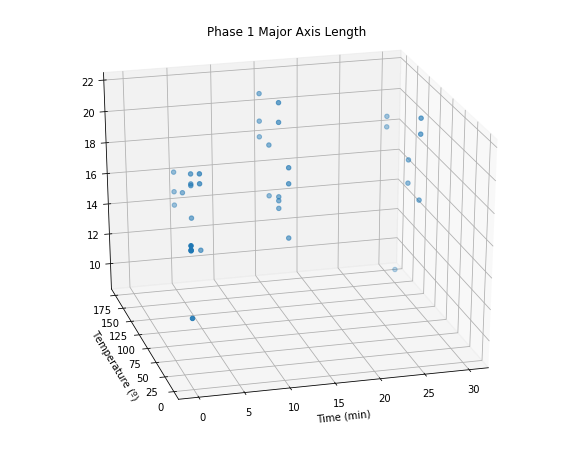

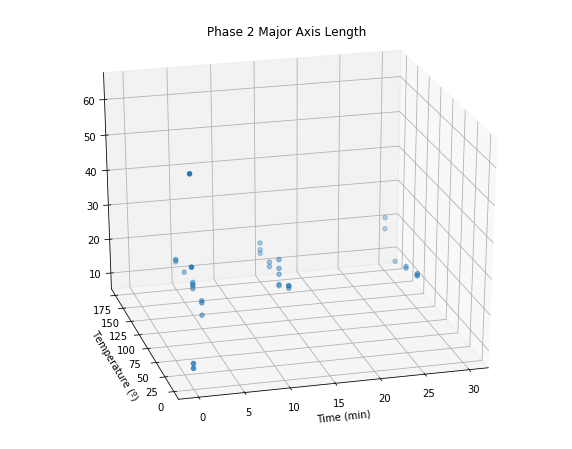

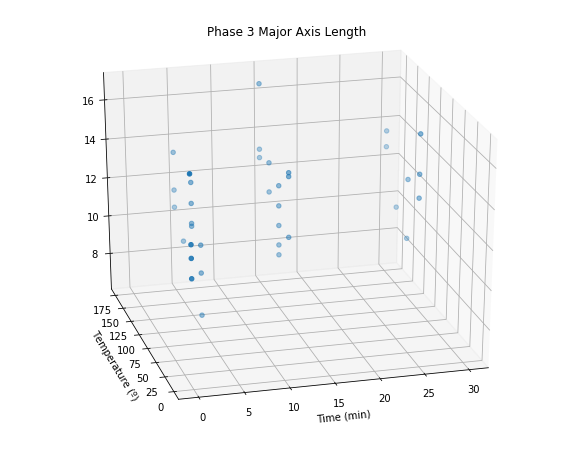

In [6]:
x1 = Phase1['Anneal_time']
y1 = Phase1['Anneal_temp']
z1 = Phase1['MajorAL_avg']
fig1 = plt.figure(figsize = (10,8))
ax1 = plt.axes(projection = '3d')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (º)')
plt.title('Phase 1 Major Axis Length')
ax1.scatter3D(x1,y1,z1)
ax1.view_init(25, 255)
plt.show()

x2 = Phase2['Anneal_time']
y2 = Phase2['Anneal_temp']
z2 = Phase2['MajorAL_avg']
fig2 = plt.figure(figsize = (10,8))
ax2 = plt.axes(projection = '3d')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (º)')
plt.title('Phase 2 Major Axis Length')
ax2.scatter3D(x2,y2,z2)
ax2.view_init(25, 255)
plt.show()

x3 = Phase3['Anneal_time']
y3 = Phase3['Anneal_temp']
z3 = Phase3['MajorAL_avg']
fig3 = plt.figure(figsize = (10,8))
ax3 = plt.axes(projection = '3d')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (º)')
plt.title('Phase 3 Major Axis Length')
ax3.scatter3D(x3,y3,z3)
ax3.view_init(25, 255)
plt.show()

# Now we need to read in the device data and associate it with its morphology descriptors

# This cell was for initially converting everything to pandas. A new, formatted & filtered spreadsheet now exists

In [17]:
# device_df = pd.read_excel('/Users/wesleytatum/Desktop/processed opv data.xlsx')
# device_df = device_df.fillna(method = 'ffill') # B/c of excel formatting, NaN values arise from merged cells. Use previous value to fill NaN's
# device_df

device_df['Substrate'] = 0

for i in range(len(device_df['File Name'])):
    fl = device_df['File Name'][i]
    sub_indeces = 0
    sub_index = 0
    sub = 0
    
    print (fl)
    
    if fl.find('Sub') != -1:
        sub_indeces = fl.index('Sub')
        sub_index = sub_indeces+3
        sub = fl[sub_index]
#         print (sub)
        
    elif fl.find('SUB') != -1:
        sub_indeces = fl.index('SUB')
        sub_index = sub_indeces+3
        sub = fl[sub_index]
#         print (sub)

    elif fl.find('NA') != -1:
        device_df['Time (min)'] = 0
        devie_df['Temp (C)'] = 0
        
    else:
        print ('woops...substrate and device location went screwy')
        
    device_df['Substrate'][i] = int(sub)

2019_4_16_P3HTPCBM_NA_3000_SUB1
2019_4_16_P3HTPCBM_NA_1000_SUB7
2019_4_16_P3HTPCBM_NA_1000_SUB7
2019_4_16_P3HTPCBM_NA_1000_SUB7
2019_4_16_P3HTPCBM_NA_3000_SUB1
2019_4_16_P3HTPCBM_NA_1000_SUB7
2019_4_16_P3HTPCBM_NA_1000_SUB7
2019_4_16_P3HTPCBM_NA_1000_SUB7
2019_4_16_P3HTPCBM_NA_3000_SUB1
2019_4_16_P3HTPCBM_NA_1000_SUB7
2019_4_16_P3HTPCBM_NA_1000_SUB7
2019_4_16_P3HTPCBM_NA_3000_SUB1
2019_4_16_P3HTPCBM_NA_3000_SUB1
2019_4_16_P3HTPCBM_NA_3000_SUB1
2019_4_16_P3HTPCBM_NA_3000_SUB1
2019_4_16_P3HTPCBM_NA_3000_SUB1
2019_05_01_P3HTPCBM_150C_5min_Sub1
2019_05_010_P3HTPCBM_125C_15min_Sub5
2019_05_08_P3HTPCBM_175C_30min_Sub8
aresing_2019-02-08_P3HTPCBM_150C_15min_Sub2
aresing_2019-02-08_P3HTPCBM_150C_15min_Sub4
aresing_2019-02-08_P3HTPCBM_150C_15min_Sub4
aresing_2019-02-08_P3HTPCBM_150C_15min_Sub9
aresing_2019-02-08_P3HTPCBM_150C_15min_Sub3
aresing_2019-02-08_P3HTPCBM_150C_15min_Sub1
aresing_2019-02-08_P3HTPCBM_150C_15min_Sub8
aresing_2019-02-08_P3HTPCBM_150C_15min_Sub4
aresing_2019-02-08_P3HTPCBM_

/Users/wesleytatum/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# This cell utilizes the formatted & filtered spreadsheet

In [8]:
device_df = pd.read_excel('/Users/wesleytatum/Desktop/formatted_opv_data.xlsx')
device_df

,Unnamed: 0,File Name,Time (min),Device,Temp (C),PCE,VocL,Jsc,FF
0,291,2019_4_16_P3HTPCBM_NA_3000_SUB1,0,5,0,0.053196,0.088773,2.319470,25.835041
1,283,2019_4_16_P3HTPCBM_NA_1000_SUB7,0,5,0,0.323514,0.706579,2.021489,22.649638
2,284,2019_4_16_P3HTPCBM_NA_1000_SUB7,0,6,0,0.620043,0.665916,1.867738,49.852415
3,280,2019_4_16_P3HTPCBM_NA_1000_SUB7,0,2,0,0.628255,0.654254,1.915640,50.127434
4,287,2019_4_16_P3HTPCBM_NA_3000_SUB1,0,1,0,0.637683,0.662407,2.204954,43.659713
...,...,...,...,...,...,...,...,...,...
361,89,2019_4_16_P3HTPCBM_150C_15min_3000_SUB3,15,7,150,2.932059,0.582550,7.188190,70.019666
362,85,2019_4_16_P3HTPCBM_150C_15min_3000_SUB3,15,3,150,3.036853,0.579876,7.438571,70.404362
363,83,2019_4_16_P3HTPCBM_150C_15min_3000_SUB3,15,1,150,3.046002,0.579518,7.438503,70.660656
364,84,2019_4_16_P3HTPCBM_150C_15min_3000_SUB3,15,2,150,3.103756,0.578146,7.587212,70.756792


In [50]:
# device_df.to_excel('/Users/wesleytatum/Desktop/OPV_device_df.xlsx')

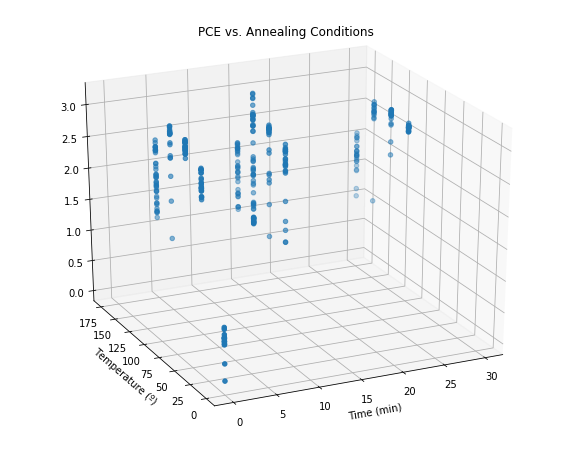

In [9]:


x1 = device_df['Time (min)']
y1 = device_df['Temp (C)']
z1 = device_df['PCE']
fig1 = plt.figure(figsize = (10,8))
ax1 = plt.axes(projection = '3d')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (º)')
plt.title('PCE vs. Annealing Conditions')
ax1.scatter3D(x1,y1,z1)
ax1.view_init(25, 245)
plt.show()

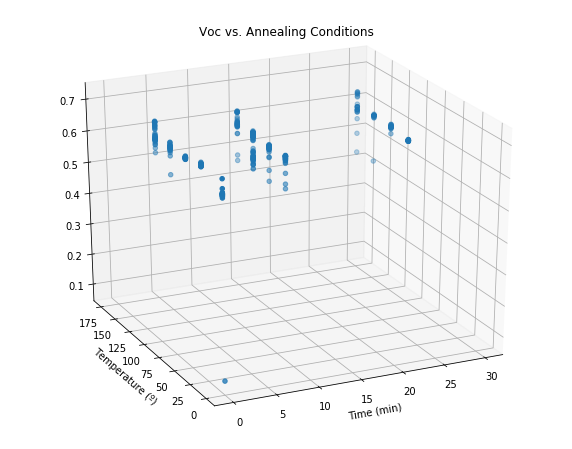

In [10]:


x1 = device_df['Time (min)']
y1 = device_df['Temp (C)']
z1 = device_df['VocL']
fig1 = plt.figure(figsize = (10,8))
ax1 = plt.axes(projection = '3d')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (º)')
plt.title('Voc vs. Annealing Conditions')
ax1.scatter3D(x1,y1,z1)
ax1.view_init(25, 245)
plt.show()

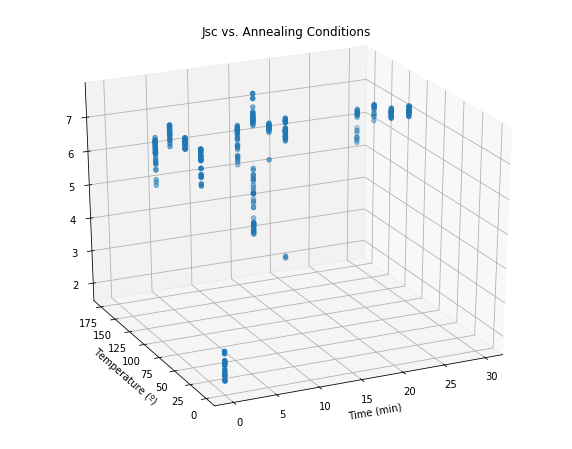

In [11]:


x1 = device_df['Time (min)']
y1 = device_df['Temp (C)']
z1 = device_df['Jsc']
fig1 = plt.figure(figsize = (10,8))
ax1 = plt.axes(projection = '3d')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (º)')
plt.title('Jsc vs. Annealing Conditions')
ax1.scatter3D(x1,y1,z1)
ax1.view_init(25, 245)
plt.show()

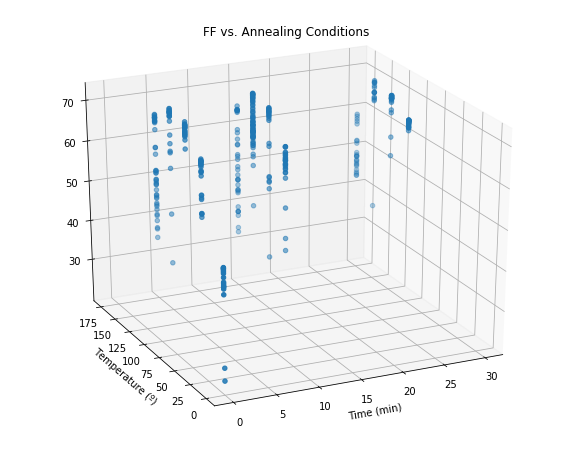

In [12]:


x1 = device_df['Time (min)']
y1 = device_df['Temp (C)']
z1 = device_df['FF']
fig1 = plt.figure(figsize = (10,8))
ax1 = plt.axes(projection = '3d')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (º)')
plt.title('FF vs. Annealing Conditions')
ax1.scatter3D(x1,y1,z1)
ax1.view_init(25, 245)
plt.show()

In [13]:
# device_df.to_excel('~/Desktop/OPV_device_df.xlsx')

# Now that the data is read in plottable, we need to use all of these parameters to predict device performance


- Create a new df with only columns needed for models
- Make sure device data is properly matched with morphology data (via time, temp, substrate, device)
- Want to fit a function that predicts PCE, Jsc, Voc, and FF from morphology and processing conditions

$$
PCE, Jsc, Voc, FF = f(anneal time, anneal temp, major axis, minor axis, perimenter, orientation, eccentricity)
$$

The problem is that there are way more devices tested than AFM images taken and processed. So, for now, the dataframe will only contain device data for those devices with morphology data too. In the full model (_i.e._ the neural network model), I'll have to find a way to use all data in training.

In [18]:
# total_df = Phase1 + Phase2 + Phase3 + device_df

Phase1['GMM_label'] = 1
Phase2['GMM_label'] = 2
Phase3['GMM_label'] = 3

total_df = Phase1.copy()
print (total_df.shape)
print (total_df.head())

total_df = total_df.append(Phase2)
print (total_df.shape)
print (total_df.head())

total_df = total_df.append(Phase3)
print (total_df.shape)
print (total_df.head())

total_df['PCE'] = 0
total_df['VocL'] = 0
total_df['Jsc'] = 0
total_df['FF'] = 0

total_df.head()

(36, 15)
  Anneal_time Anneal_temp Substrate Device  MajorAL_avg  MajorAL_stdev  \
0          15         100         4      2    17.194652      29.172066   
1          15         100         4      4    13.709728      14.635628   
2          15         100         4      7    18.211098      21.013541   
3          30         100         7      2    19.640309      46.935628   
4          30         100         7      4    20.647291      35.791550   

   MinorAL_avg  MinorAL_stdev   Ecc_avg  Ecc_stdev  Orient_avg  Orient_stdev  \
0     8.554721      14.246681  0.820518   0.142370   -0.050137      1.067225   
1     6.938374       7.985216  0.824877   0.138410   -0.205623      1.075388   
2     8.857453      10.356933  0.826205   0.148190   -0.414390      1.047842   
3     9.781374      26.994708  0.857443   0.105577   -0.331902      0.940640   
4     8.412561      11.216702  0.833485   0.136928   -0.454930      0.862964   

    Perim_avg  Perim_stdev  GMM_label  
0   97.003245   352.67759

,Anneal_time,Anneal_temp,Substrate,Device,MajorAL_avg,MajorAL_stdev,MinorAL_avg,MinorAL_stdev,Ecc_avg,Ecc_stdev,Orient_avg,Orient_stdev,Perim_avg,Perim_stdev,GMM_label,PCE,VocL,Jsc,FF
0,15,100,4,2,17.194652,29.172066,8.554721,14.246681,0.820518,0.142370,-0.050137,1.067225,97.003245,352.677591,1,0,0,0,0
1,15,100,4,4,13.709728,14.635628,6.938374,7.985216,0.824877,0.138410,-0.205623,1.075388,48.559552,98.492589,1,0,0,0,0
2,15,100,4,7,18.211098,21.013541,8.857453,10.356933,0.826205,0.148190,-0.414390,1.047842,75.736366,151.456627,1,0,0,0,0
3,30,100,7,2,19.640309,46.935628,9.781374,26.994708,0.857443,0.105577,-0.331902,0.940640,236.482362,1306.085256,1,0,0,0,0
4,30,100,7,4,20.647291,35.791550,8.412561,11.216702,0.833485,0.136928,-0.454930,0.862964,96.093361,315.148913,1,0,0,0,0


In [19]:
# for each row in total_df, find row in device_df with same time, temp, sub, and dev. then append PCE, Jsc, Voc, and FF values to total_df

NA_count = 0 # NA = no anneal, whose filenames have different schemes

for i in range(len(total_df['Anneal_time'])):
    print (i)
    pce = 0
    voc = 0
    jsc = 0
    ff = 0
    
    time = total_df['Anneal_time'].iloc[i]
    temp = total_df['Anneal_temp'].iloc[i]
    sub = total_df['Substrate'].iloc[i]
    sub = int(sub)
    dev = total_df['Device'].iloc[i]
    dev = int(dev)
    
    time_df = device_df[device_df['Time (min)'] == time]
    temp_df = time_df[time_df['Temp (C)'] == temp]
    sub_df = temp_df[temp_df['Substrate'] == sub]
    dev_row = sub_df[sub_df['Device'] == dev]
    
    if dev_row.shape[0] != 0:
    
        pce = dev_row['PCE'].iloc[-1]
        voc = dev_row['VocL'].iloc[-1]
        jsc = dev_row['Jsc'].iloc[-1]
        ff = dev_row['FF'].iloc[-1]
        
    elif dev_row.shape[0] == 0:
        if time == 0:
            
            NA_df = device_df[device_df['Time (min)'] == time]
            
            pce = NA_df['PCE'].iloc[NA_count]
            voc = NA_df['VocL'].iloc[NA_count]
            jsc = NA_df['Jsc'].iloc[NA_count]
            ff = NA_df['FF'].iloc[NA_count]
            
            NA_count += 1 
            
        else:
            pass
    else:
        pass
        
    
    total_df['PCE'].iloc[i] = pce
    total_df['VocL'].iloc[i] = voc
    total_df['Jsc'].iloc[i] = jsc
    total_df['FF'].iloc[i] = ff
    
total_df.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29

/Users/wesleytatum/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)



30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107


,Anneal_time,Anneal_temp,Substrate,Device,MajorAL_avg,MajorAL_stdev,MinorAL_avg,MinorAL_stdev,Ecc_avg,Ecc_stdev,Orient_avg,Orient_stdev,Perim_avg,Perim_stdev,GMM_label,PCE,VocL,Jsc,FF
0,15,100,4,2,17.194652,29.172066,8.554721,14.246681,0.820518,0.142370,-0.050137,1.067225,97.003245,352.677591,1,2.311387,0.577792,6.963861,57.44484
1,15,100,4,4,13.709728,14.635628,6.938374,7.985216,0.824877,0.138410,-0.205623,1.075388,48.559552,98.492589,1,1.763230,0.522596,7.047848,47.87256
2,15,100,4,7,18.211098,21.013541,8.857453,10.356933,0.826205,0.148190,-0.414390,1.047842,75.736366,151.456627,1,2.394418,0.575790,6.939877,59.92170
3,30,100,7,2,19.640309,46.935628,9.781374,26.994708,0.857443,0.105577,-0.331902,0.940640,236.482362,1306.085256,1,2.628197,0.569525,7.301575,63.20169
4,30,100,7,4,20.647291,35.791550,8.412561,11.216702,0.833485,0.136928,-0.454930,0.862964,96.093361,315.148913,1,2.710602,0.568631,7.328048,65.04993


In [49]:
# total_df.to_excel('/Users/wesleytatum/Desktop/OPV_total_df.xlsx')

# We have all our device and morphology data in total_df. Now we can use it to train regression models for in-depth plotting!!

In [33]:
X = total_df[['Anneal_time', 'Anneal_temp', 'MajorAL_avg', 'MinorAL_avg', 'Ecc_avg', 'Orient_avg', 'Perim_avg']] # all of the different features, including annealing conditions
Y = total_df[['PCE', 'VocL', 'Jsc', 'FF']] # device performance

x_train, x_test, y_train, y_test = train_test_split(X, Y)

alphas = np.logspace(-6, 1, 200)
coeffs = {}
train_errors = []
test_errors = []

for i, a in enumerate(alphas):
    lasso = linear_model.Lasso(alpha = a)
    lasso.fit(x_train, y_train)

    y_train_pred = lasso.predict(x_train)
    y_test_pred = lasso.predict(x_test)


    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    coeffs[i]=lasso.coef_
    train_errors.append(train_mse)
    test_errors.append(test_mse)

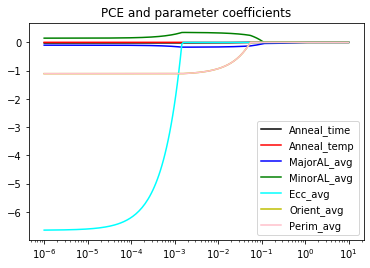

In [21]:
pce_co1 = []
pce_co2 = []
pce_co3 = []
pce_co4 = []
pce_co5 = []
pce_co6 = []
pce_co7 = []

for k in coeffs.keys():
    pce_co1.append(coeffs[k][0][0])
    pce_co2.append(coeffs[k][0][1])
    pce_co3.append(coeffs[k][0][2])
    pce_co4.append(coeffs[k][0][3])
    pce_co5.append(coeffs[k][0][4])
    pce_co6.append(coeffs[k][0][5])
    pce_co7.append(coeffs[k][0][6])
    
fig = plt.Figure(figsize = (30,20))
plt.plot(alphas, pce_co1, c = 'k', label = 'Anneal_time')
plt.plot(alphas, pce_co2, c = 'r', label = 'Anneal_temp')
plt.plot(alphas, pce_co3, c = 'b', label = 'MajorAL_avg')
plt.plot(alphas, pce_co4, c = 'g', label = 'MinorAL_avg')
plt.plot(alphas, pce_co5, c = 'cyan', label = 'Ecc_avg')
plt.plot(alphas, pce_co6, c = 'y', label = 'Orient_avg')
plt.plot(alphas, pce_co6, c = 'pink', label = 'Perim_avg')
plt.legend()
ax = plt.gca()
ax.set_xscale('log')
plt.title('PCE and parameter coefficients')
plt.show()

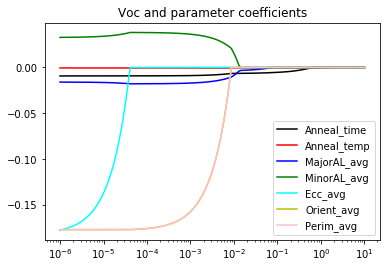

In [22]:
voc_co1 = []
voc_co2 = []
voc_co3 = []
voc_co4 = []
voc_co5 = []
voc_co6 = []
voc_co7 = []

for k in coeffs.keys():
    voc_co1.append(coeffs[k][1][0])
    voc_co2.append(coeffs[k][1][1])
    voc_co3.append(coeffs[k][1][2])
    voc_co4.append(coeffs[k][1][3])
    voc_co5.append(coeffs[k][1][4])
    voc_co6.append(coeffs[k][1][5])
    voc_co7.append(coeffs[k][1][6])
    
fig = plt.Figure(figsize = (30,20))
plt.plot(alphas, voc_co1, c = 'k', label = 'Anneal_time')
plt.plot(alphas, voc_co2, c = 'r', label = 'Anneal_temp')
plt.plot(alphas, voc_co3, c = 'b', label = 'MajorAL_avg')
plt.plot(alphas, voc_co4, c = 'g', label = 'MinorAL_avg')
plt.plot(alphas, voc_co5, c = 'cyan', label = 'Ecc_avg')
plt.plot(alphas, voc_co6, c = 'y', label = 'Orient_avg')
plt.plot(alphas, voc_co6, c = 'pink', label = 'Perim_avg')
plt.legend()
ax = plt.gca()
ax.set_xscale('log')
plt.title('Voc and parameter coefficients')
plt.show()

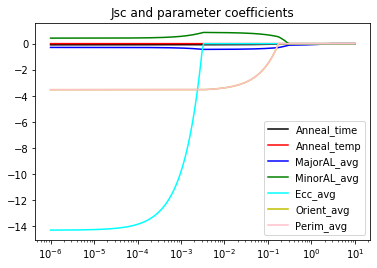

In [23]:
jsc_co1 = []
jsc_co2 = []
jsc_co3 = []
jsc_co4 = []
jsc_co5 = []
jsc_co6 = []
jsc_co7 = []

for k in coeffs.keys():
    jsc_co1.append(coeffs[k][2][0])
    jsc_co2.append(coeffs[k][2][1])
    jsc_co3.append(coeffs[k][2][2])
    jsc_co4.append(coeffs[k][2][3])
    jsc_co5.append(coeffs[k][2][4])
    jsc_co6.append(coeffs[k][2][5])
    jsc_co7.append(coeffs[k][2][6])
    
fig = plt.Figure(figsize = (30,20))
plt.plot(alphas, jsc_co1, c = 'k', label = 'Anneal_time')
plt.plot(alphas, jsc_co2, c = 'r', label = 'Anneal_temp')
plt.plot(alphas, jsc_co3, c = 'b', label = 'MajorAL_avg')
plt.plot(alphas, jsc_co4, c = 'g', label = 'MinorAL_avg')
plt.plot(alphas, jsc_co5, c = 'cyan', label = 'Ecc_avg')
plt.plot(alphas, jsc_co6, c = 'y', label = 'Orient_avg')
plt.plot(alphas, jsc_co6, c = 'pink', label = 'Perim_avg')
plt.legend()
ax = plt.gca()
ax.set_xscale('log')
plt.title('Jsc and parameter coefficients')
plt.show()

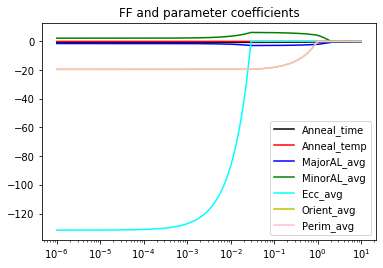

In [24]:
ff_co1 = []
ff_co2 = []
ff_co3 = []
ff_co4 = []
ff_co5 = []
ff_co6 = []
ff_co7 = []

for k in coeffs.keys():
    ff_co1.append(coeffs[k][3][0])
    ff_co2.append(coeffs[k][3][1])
    ff_co3.append(coeffs[k][3][2])
    ff_co4.append(coeffs[k][3][3])
    ff_co5.append(coeffs[k][3][4])
    ff_co6.append(coeffs[k][3][5])
    ff_co7.append(coeffs[k][3][6])
    
fig = plt.Figure(figsize = (30,20))
plt.plot(alphas, ff_co1, c = 'k', label = 'Anneal_time')
plt.plot(alphas, ff_co2, c = 'r', label = 'Anneal_temp')
plt.plot(alphas, ff_co3, c = 'b', label = 'MajorAL_avg')
plt.plot(alphas, ff_co4, c = 'g', label = 'MinorAL_avg')
plt.plot(alphas, ff_co5, c = 'cyan', label = 'Ecc_avg')
plt.plot(alphas, ff_co6, c = 'y', label = 'Orient_avg')
plt.plot(alphas, ff_co6, c = 'pink', label = 'Perim_avg')
plt.legend()
ax = plt.gca()
ax.set_xscale('log')
plt.title('FF and parameter coefficients')
plt.show()

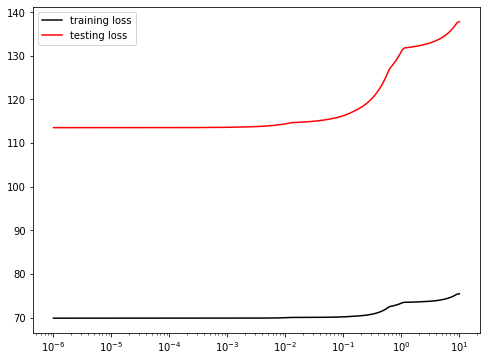

In [34]:
fig, ax = plt.subplots(figsize = (8,6))
plt.plot(alphas, train_errors, c = 'k', label = 'training loss')
plt.plot(alphas, test_errors, c = 'r', label = 'testing loss')
ax.set_xscale('log')
plt.legend()
plt.show()

# Generate a LASSO fit with the best alpha, determined from graph above. Then use it to predict each target feature and visualize

In [36]:
lasso = linear_model.Lasso(alpha = 0.00001)
lasso.fit(x_train, y_train)

y_train_pred = lasso.predict(x_train)
y_test_pred = lasso.predict(x_test)

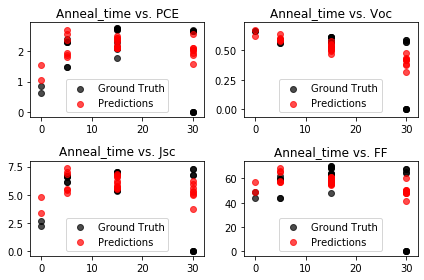

In [48]:
fig1 = plt.Figure(figsize=(25,25))
plt.subplot(221)
plt.scatter(x_test['Anneal_time'], y_test['PCE'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Anneal_time'], y_test_pred[:,0], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Anneal_time vs. PCE')

plt.subplot(222)
plt.scatter(x_test['Anneal_time'], y_test['VocL'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Anneal_time'], y_test_pred[:,1], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Anneal_time vs. Voc')

plt.subplot(223)
plt.scatter(x_test['Anneal_time'], y_test['Jsc'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Anneal_time'], y_test_pred[:,2], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Anneal_time vs. Jsc')

plt.subplot(224)
plt.scatter(x_test['Anneal_time'], y_test['FF'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Anneal_time'], y_test_pred[:,3], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Anneal_time vs. FF')

plt.tight_layout()
plt.show()

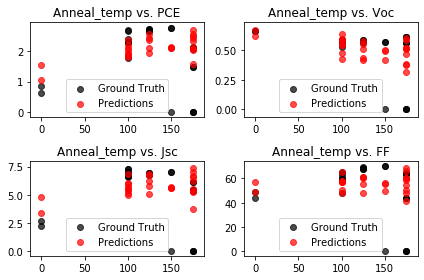

In [47]:
fig1 = plt.Figure(figsize=(25,25))
plt.subplot(221)
plt.scatter(x_test['Anneal_temp'], y_test['PCE'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Anneal_temp'], y_test_pred[:,0], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Anneal_temp vs. PCE')

plt.subplot(222)
plt.scatter(x_test['Anneal_temp'], y_test['VocL'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Anneal_temp'], y_test_pred[:,1], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Anneal_temp vs. Voc')

plt.subplot(223)
plt.scatter(x_test['Anneal_temp'], y_test['Jsc'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Anneal_temp'], y_test_pred[:,2], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Anneal_temp vs. Jsc')

plt.subplot(224)
plt.scatter(x_test['Anneal_temp'], y_test['FF'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Anneal_temp'], y_test_pred[:,3], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Anneal_temp vs. FF')

plt.tight_layout()
plt.show()

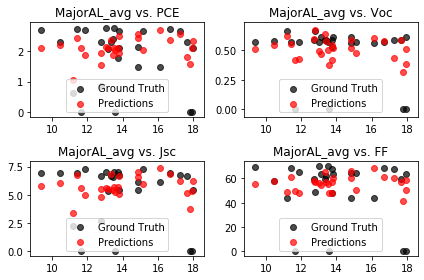

In [46]:
fig1 = plt.Figure(figsize=(25,25))
plt.subplot(221)
plt.scatter(x_test['MajorAL_avg'], y_test['PCE'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['MajorAL_avg'], y_test_pred[:,0], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('MajorAL_avg vs. PCE')

plt.subplot(222)
plt.scatter(x_test['MajorAL_avg'], y_test['VocL'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['MajorAL_avg'], y_test_pred[:,1], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('MajorAL_avg vs. Voc')

plt.subplot(223)
plt.scatter(x_test['MajorAL_avg'], y_test['Jsc'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['MajorAL_avg'], y_test_pred[:,2], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('MajorAL_avg vs. Jsc')

plt.subplot(224)
plt.scatter(x_test['MajorAL_avg'], y_test['FF'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['MajorAL_avg'], y_test_pred[:,3], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('MajorAL_avg vs. FF')

plt.tight_layout()
plt.show()

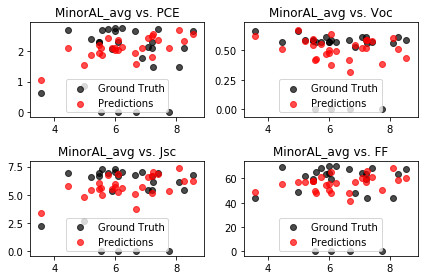

In [45]:
fig1 = plt.Figure(figsize=(25,25))
plt.subplot(221)
plt.scatter(x_test['MinorAL_avg'], y_test['PCE'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['MinorAL_avg'], y_test_pred[:,0], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('MinorAL_avg vs. PCE')

plt.subplot(222)
plt.scatter(x_test['MinorAL_avg'], y_test['VocL'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['MinorAL_avg'], y_test_pred[:,1], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('MinorAL_avg vs. Voc')

plt.subplot(223)
plt.scatter(x_test['MinorAL_avg'], y_test['Jsc'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['MinorAL_avg'], y_test_pred[:,2], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('MinorAL_avg vs. Jsc')

plt.subplot(224)
plt.scatter(x_test['MinorAL_avg'], y_test['FF'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['MinorAL_avg'], y_test_pred[:,3], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('MinorAL_avg vs. FF')

plt.tight_layout()
plt.show()

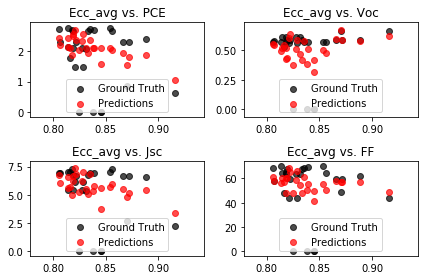

In [44]:
fig1 = plt.Figure(figsize=(25,25))
plt.subplot(221)
plt.scatter(x_test['Ecc_avg'], y_test['PCE'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Ecc_avg'], y_test_pred[:,0], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Ecc_avg vs. PCE')

plt.subplot(222)
plt.scatter(x_test['Ecc_avg'], y_test['VocL'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Ecc_avg'], y_test_pred[:,1], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Ecc_avg vs. Voc')

plt.subplot(223)
plt.scatter(x_test['Ecc_avg'], y_test['Jsc'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Ecc_avg'], y_test_pred[:,2], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Ecc_avg vs. Jsc')

plt.subplot(224)
plt.scatter(x_test['Ecc_avg'], y_test['FF'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Ecc_avg'], y_test_pred[:,3], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Ecc_avg vs. FF')

plt.tight_layout()
plt.show()

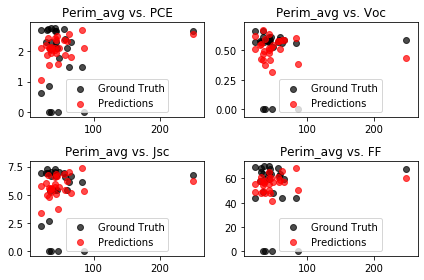

In [43]:
fig1 = plt.Figure(figsize=(25,25))
plt.subplot(221)
plt.scatter(x_test['Perim_avg'], y_test['PCE'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Perim_avg'], y_test_pred[:,0], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Perim_avg vs. PCE')

plt.subplot(222)
plt.scatter(x_test['Perim_avg'], y_test['VocL'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Perim_avg'], y_test_pred[:,1], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Perim_avg vs. Voc')

plt.subplot(223)
plt.scatter(x_test['Perim_avg'], y_test['Jsc'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Perim_avg'], y_test_pred[:,2], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Perim_avg vs. Jsc')

plt.subplot(224)
plt.scatter(x_test['Perim_avg'], y_test['FF'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Perim_avg'], y_test_pred[:,3], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Perim_avg vs. FF')

plt.tight_layout()
plt.show()

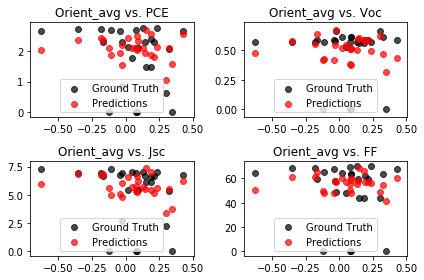

In [42]:
fig1 = plt.Figure(figsize=(25,25))
plt.subplot(221)
plt.scatter(x_test['Orient_avg'], y_test['PCE'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Orient_avg'], y_test_pred[:,0], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Orient_avg vs. PCE')

plt.subplot(222)
plt.scatter(x_test['Orient_avg'], y_test['VocL'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Orient_avg'], y_test_pred[:,1], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Orient_avg vs. Voc')

plt.subplot(223)
plt.scatter(x_test['Orient_avg'], y_test['Jsc'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Orient_avg'], y_test_pred[:,2], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Orient_avg vs. Jsc')

plt.subplot(224)
plt.scatter(x_test['Orient_avg'], y_test['FF'], c = 'k', label = 'Ground Truth', alpha = 0.7)
plt.scatter(x_test['Orient_avg'], y_test_pred[:,3], c = 'r', label = 'Predictions', alpha = 0.7)
plt.legend(loc = 'lower center')
plt.title('Orient_avg vs. FF')

plt.tight_layout()
plt.show()

______________________________________________
______________________________________________

# Troubleshooting and developing below here

______________________________________________
______________________________________________

In [30]:
for fl in files:
    print (fl)
    if fl.find('Sub') != -1:
        sub_indeces = fl.index('Sub')
        sub_index = sub_indeces+3
        sub = fl[sub_index]
        print (sub)
        
        if fl.find('postexam') != -1:
            dev = 3
            print (dev)

        else:
            dev_indeces = fl.index('Dev')
            dev_index = dev_indeces+3
            dev = fl[dev_index]
            print (dev)
    
    elif fl.find('Sub') == -1:
        sub_indeces = fl.index('S')
        sub_index = sub_indeces+1
        sub = fl[sub_index]
        print (sub)

        dev_indeces = fl.index('D')
        dev_index = dev_indeces+1
        dev = fl[dev_index]
        print (dev)
        
    else:
        print ('woops')

100C_15min_Sub4_Dev2_domain_metrics.csv
4
2
100C_15min_Sub4_Dev4_domain_metrics.csv
4
4
100C_15min_Sub4_Dev7_domain_metrics.csv
4
7
100C_30min_Sub7_Dev2_domain_metrics.csv
7
2
100C_30min_Sub7_Dev4_domain_metrics.csv
7
4
100C_30min_Sub7_Dev7_domain_metrics.csv
7
7
100C_5min_Sub1_Dev3_domain_metrics.csv
1
3
100C_5min_Sub1_Dev4_90D_domain_metrics.csv
1
4
100C_5min_Sub1_Dev4_domain_metrics.csv
1
4
125C_15min_Sub4_Dev1_domain_metrics.csv
4
1
125C_15min_Sub4_Dev2_domain_metrics.csv
4
2
125C_15min_Sub4_Dev6_domain_metrics.csv
4
6
125C_15min_Sub4_Dev7_domain_metrics.csv
4
7
125C_15min_Sub4_postexam_domain_metrics.csv
4
3
125C_30min_Sub8_Dev3_domain_metrics.csv
8
3
125C_30min_Sub8_postexam_domain_metrics.csv
8
3
125C_5min_Sub1_Dev2_domain_metrics.csv
1
2
125C_5min_Sub1_Dev3_domain_metrics.csv
1
3
125C_5min_Sub1_Dev6_domain_metrics.csv
1
6
125C_5min_Sub1_postexam_domain_metrics.csv
1
3
150C_15min_Sub4_Dev1_domain_metrics.csv
4
1
150C_15min_Sub4_Dev7_domain_metrics.csv
4
7
150C_30min_Sub7_Dev3_do

In [43]:
100 == 100.0

True

In [16]:
time = 0
temp = 0
sub = 4
dev = 2


test = device_df[device_df['Time (min)'] == time]
print (test.shape)

test1 = test[test['Temp (C)'] == temp]
print (test1.shape)

test2 = test1[test1['Substrate'] == sub]
print (test2.shape)

test3 = test2[test2['Device'] == dev]
print (test3.shape)
test3

(16, 9)
(16, 9)
(0, 9)
(0, 9)


,File Name,Time (min),Device,Temp (C),PCE,VocL,Jsc,FF,Substrate


In [17]:
test1

,File Name,Time (min),Device,Temp (C),PCE,VocL,Jsc,FF,Substrate
544,2019_4_16_P3HTPCBM_NA_1000_SUB7,0.0,1,0,0.677627,0.677331,2.144910,46.642351,7
545,2019_4_16_P3HTPCBM_NA_1000_SUB7,0.0,2,0,0.628255,0.654254,1.915640,50.127434,7
546,2019_4_16_P3HTPCBM_NA_1000_SUB7,0.0,3,0,0.667399,0.659943,2.022991,49.990281,7
547,2019_4_16_P3HTPCBM_NA_1000_SUB7,0.0,4,0,0.725201,0.655834,2.428190,45.538834,7
548,2019_4_16_P3HTPCBM_NA_1000_SUB7,0.0,5,0,0.323514,0.706579,2.021489,22.649638,7
549,2019_4_16_P3HTPCBM_NA_1000_SUB7,0.0,6,0,0.620043,0.665916,1.867738,49.852415,7
550,2019_4_16_P3HTPCBM_NA_1000_SUB7,0.0,7,0,0.670255,0.659979,2.084238,48.726225,7
551,2019_4_16_P3HTPCBM_NA_1000_SUB7,0.0,8,0,0.721146,0.649909,2.436711,45.537223,7
552,2019_4_16_P3HTPCBM_NA_3000_SUB1,0.0,1,0,0.637683,0.662407,2.204954,43.659713,1
553,2019_4_16_P3HTPCBM_NA_3000_SUB1,0.0,2,0,0.706948,0.662689,2.368623,45.038290,1


In [19]:
time = 0
temp = 0
sub = 4
dev = 2


test = total_df[total_df['Anneal_time'] == time]
print (test.shape)

test1 = test[test['Anneal_temp'] == temp]
print (test1.shape)

test2 = test1[test1['Substrate'] == sub]
print (test2.shape)

test3 = test2[test2['Device'] == dev]
print (test3.shape)

test

(12, 19)
(12, 19)
(0, 19)
(0, 19)


,Anneal_time,Anneal_temp,Substrate,Device,MajorAL_avg,MajorAL_stdev,MinorAL_avg,MinorAL_stdev,Ecc_avg,Ecc_stdev,Orient_avg,Orient_stdev,Perim_avg,Perim_stdev,GMM_label,PCE,VocL,Jsc,FF
32,0,0,1,1,16.958970,22.979118,6.928658,10.234174,0.886164,0.128352,0.297267,1.299622,80.994690,248.046190,1,0.637683,0.662407,2.204954,43.659713
33,0,0,1,4,12.789539,11.140250,4.982281,3.771026,0.870516,0.119248,-0.022813,0.450956,32.447792,40.095020,1,0.861752,0.657279,2.667796,49.145099
34,0,0,2,1,17.263545,20.648460,5.901084,8.564153,0.910885,0.114003,0.320258,1.350832,65.587095,168.705097,1,0.000000,0.000000,0.000000,0.000000
35,0,0,3,1,16.998574,18.822216,6.773289,10.292247,0.905655,0.131148,0.311354,1.327269,80.421039,193.972284,1,0.000000,0.000000,0.000000,0.000000
32,0,0,1,1,11.202835,7.284830,3.572354,3.047932,0.915905,0.099707,0.303322,1.350191,21.195398,24.027392,2,0.000000,0.000000,0.000000,0.000000
33,0,0,1,4,12.547662,11.525117,4.739958,3.338181,0.869578,0.114944,-0.040305,0.481310,31.213935,41.415615,2,0.000000,0.000000,0.000000,0.000000
34,0,0,2,1,63.497943,46.676196,23.737751,15.533809,0.874847,0.098832,-0.096706,0.941245,191.254180,148.301406,2,0.000000,0.000000,0.000000,0.000000
35,0,0,3,1,38.920829,53.250404,14.457086,16.819504,0.875440,0.122771,0.253362,1.239796,142.401644,212.630909,2,0.000000,0.000000,0.000000,0.000000
32,0,0,1,1,16.654294,15.085095,8.133557,5.965564,0.788927,0.169774,0.278759,0.938508,51.860395,56.845220,3,0.000000,0.000000,0.000000,0.000000
33,0,0,1,4,11.625077,9.366525,4.454145,2.902850,0.875493,0.111169,-0.038648,0.434782,27.016969,29.474921,3,0.000000,0.000000,0.000000,0.000000
